In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
random.seed(4)
def randn_bits(n):
    '''
    Generate n binary random variables {0,1}; In order B1B2...Bn
    '''
    bits = []
    for i in range(n):
        bits.append(random.randint(0, 1))

    return bits 

In [4]:
def fb(bits):
    '''
    Nonnegative integer whose binary representation is given by
    BnBn-1...B2B1
    '''
    sum = 0
    for i in range(len(bits)):
        sum += bits[i]*(2**(i))
        
    return sum

In [5]:
def p_z_given_bs(alpha, z, bits):
    '''
    Prior probability of P(Z|B1, B2,..., Bn)
    '''
    return (((1 - alpha)/(1 + alpha))*(alpha**abs(z - fb(bits))))

In [6]:
def indicator(desired, actual):
    '''
    Indicator function
    '''
    if desired == actual:
        return 1
    else:
        return 0

In [7]:
def p_bi_z(n_samples):
    alpha = 0.2
    z = 128
    n_rvs = 10

    num = [0]*5
    denom = 0
    for i in range(n_samples):
        bits = randn_bits(n_rvs)
        for j in range(5):
            num[j] += indicator(bits[2*j + 1], 1)*p_z_given_bs(alpha, z, bits)
        denom += p_z_given_bs(alpha, z, bits)

    probs = [x / denom for x in num]
    return probs
    

In [8]:
n_samples = [10**i for i in range(1, 8)]
probs = []
for n in n_samples:
    probs.append(p_bi_z(n))

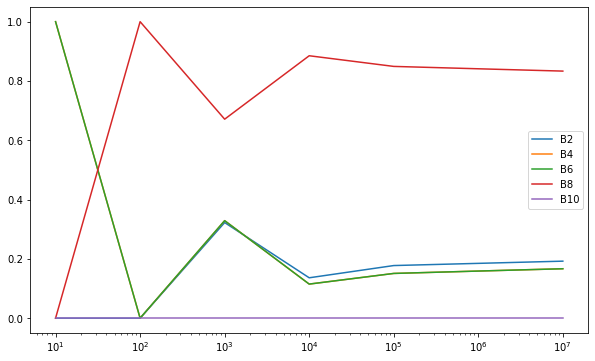

In [9]:
plt.figure(figsize=(10,6))
lineObjects = plt.plot(n_samples, probs)
plt.legend(iter(lineObjects), ("B2", "B4", "B6", "B8", "B10"))
plt.xscale("log")

In [15]:
print(probs[-1])

[0.1922881447326238, 0.16672044933143992, 0.16671873260430486, 0.8332812673973782, 3.324539045155545e-269]
